In [1]:
from rubix.image.filters import load_filters

curves = load_filters("sdss2010-*")
curves

FilterCurves(
  filters=[
    Filter(wavelength=f32[81], response=f32[81], name='sdss2010-u'),
    Filter(wavelength=f32[103], response=f32[103], name='sdss2010-g'),
    Filter(wavelength=f32[86], response=f32[86], name='sdss2010-r'),
    Filter(wavelength=f32[92], response=f32[92], name='sdss2010-i'),
    Filter(wavelength=f32[174], response=f32[174], name='sdss2010-z')
  ]
)

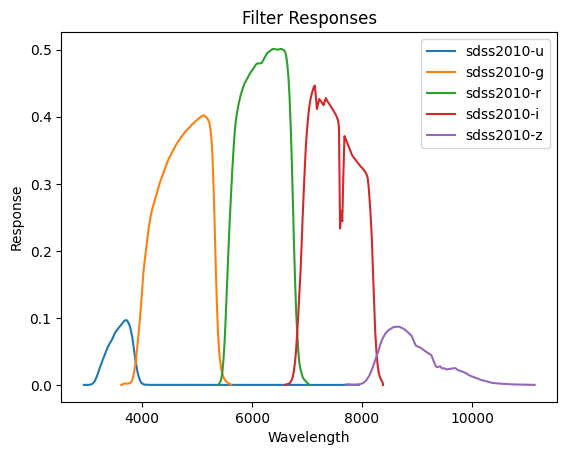

In [2]:
curves.plot()

In [3]:
import numpy as np
cube = np.load("data/datacube.npy")
wave = np.load("data/wave.npy")
print(cube.shape)
print(wave.shape)

(25, 25, 3721)
(3721,)


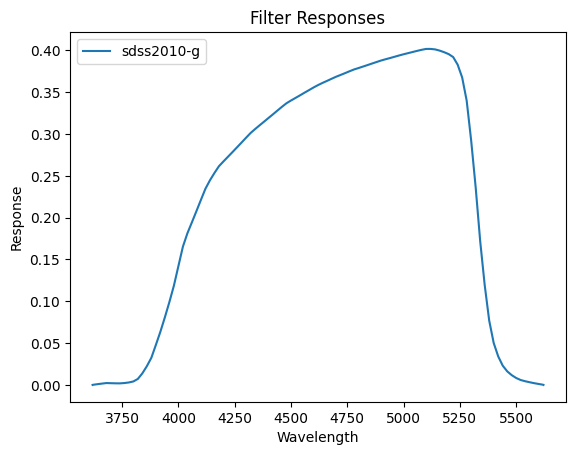

In [4]:
filter = curves[1]
filter.plot()

In [5]:
from rubix.image.filters import convolve_filter_with_cube

In [6]:
convolved = convolve_filter_with_cube(filter, cube, wave)
print(convolved.shape)

(25, 25)


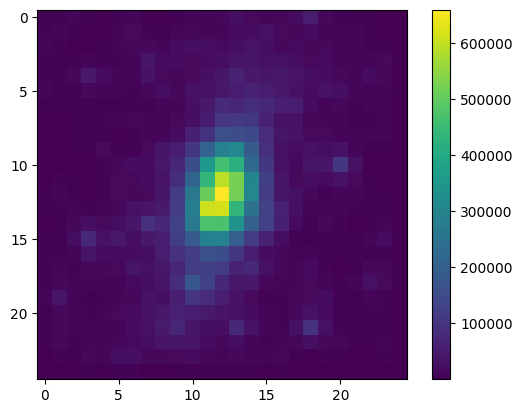

In [7]:
import matplotlib.pyplot as plt
plt.imshow(convolved)
plt.colorbar()

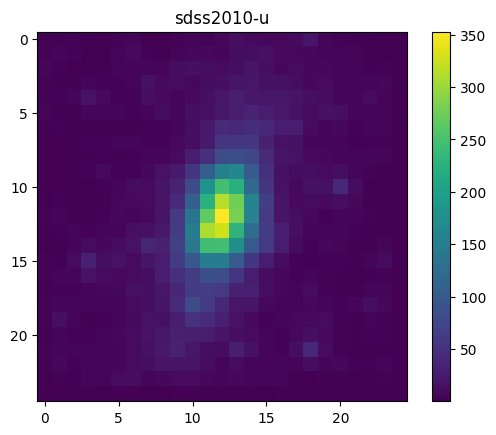

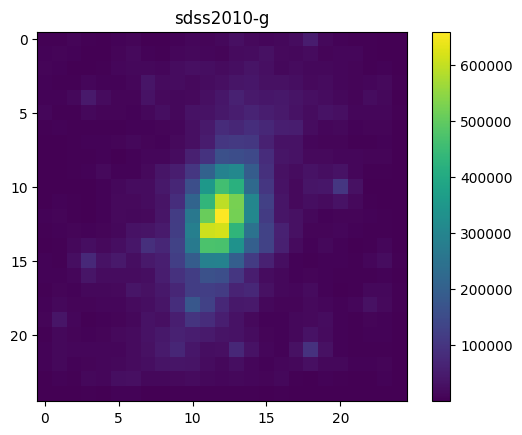

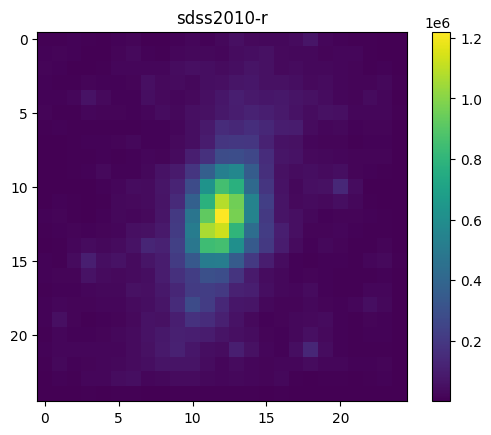

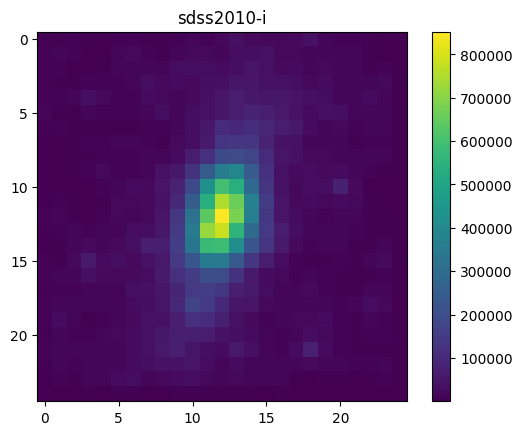

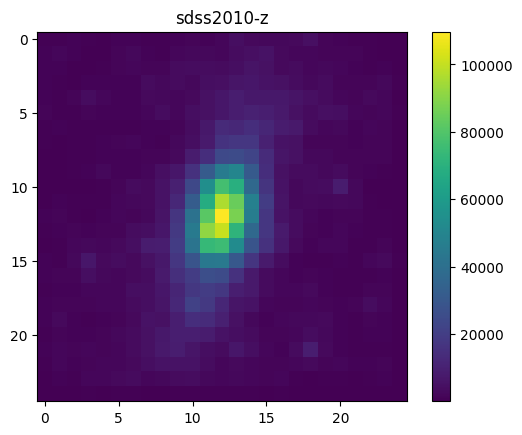

In [8]:
for filter in curves:
    convolved = convolve_filter_with_cube(filter, cube, wave)
    plt.figure()
    plt.imshow(convolved)
    plt.colorbar()
    plt.title(filter.name)

In [10]:
filters,images =curves.get_images(cube, wave).values()

In [11]:
filters

['sdss2010-u', 'sdss2010-g', 'sdss2010-r', 'sdss2010-i', 'sdss2010-z']

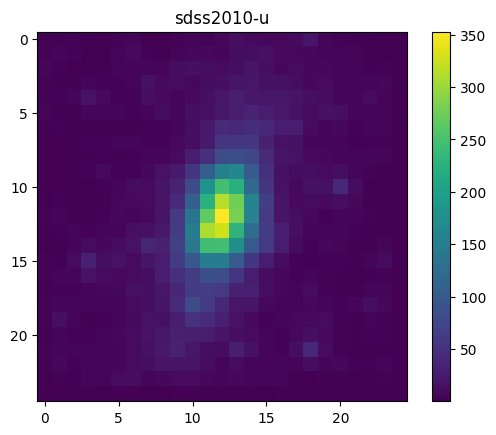

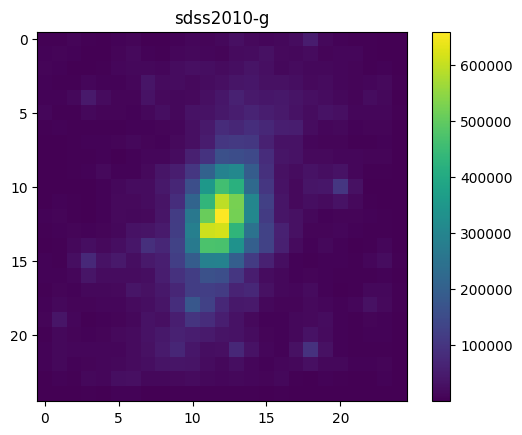

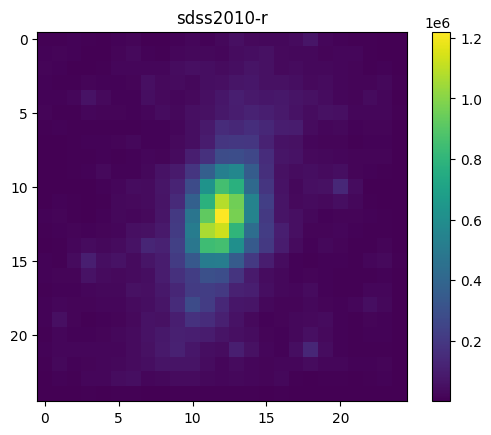

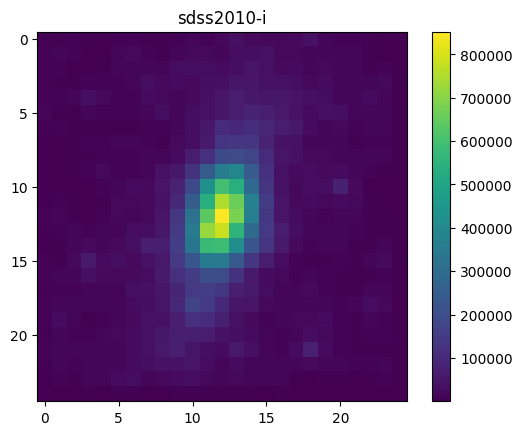

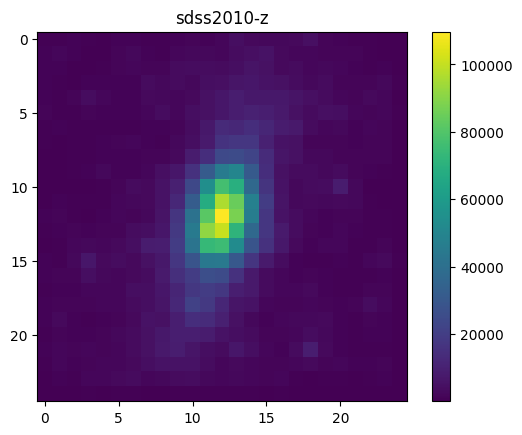

In [13]:
for i,name in zip(images, filters):
    plt.figure()
    plt.imshow(i)
    plt.colorbar()
    plt.title(name)

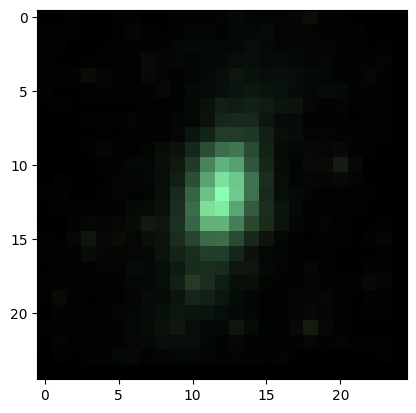

In [29]:
# Create an RGB image
# Normalize the images
def normalize(image):
    image_min = image.min()
    image_max = image.max()
    return (image - image_min) / (image_max - image_min)

r = images[1]
g = images[2]
b = images[3]

rgb = np.stack([r,g,b], axis=-1)

rgb = normalize(rgb)

plt.imshow(rgb)

